# Task 1
- How many columns are there?
    - 3 columns: Name, Gender, Number of occurencies of the name
- How are columns separated?
    - The columns are separeted with commas
- Is there a header on top of the files?
    - No header is present

# Task 2

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

names2021 = pd.read_csv('names/yob2021.txt', header=None, names=['name', 'gender', 'count'])
names2021

,name,gender,count
0,Olivia,F,17728
1,Emma,F,15433
2,Charlotte,F,13285
3,Amelia,F,12952
4,Ava,F,12759
...,...,...,...
31532,Zyeire,M,5
31533,Zyel,M,5
31534,Zyian,M,5
31535,Zylar,M,5


# Task 3

In [23]:
names2021.head(10)

,name,gender,count
0,Olivia,F,17728
1,Emma,F,15433
2,Charlotte,F,13285
3,Amelia,F,12952
4,Ava,F,12759
5,Sophia,F,12496
6,Isabella,F,11201
7,Mia,F,11096
8,Evelyn,F,9434
9,Harper,F,8388


# Task 4

In [24]:
names2021.shape

(31537, 3)

# Task 5

In [25]:
names2021['count'].sum()

3361375

# Task 6

In [26]:
females = names2021[names2021['gender'] == 'F']
males = names2021[names2021['gender'] == 'M']
print('Females: ' + str(females['count'].sum()))
print('Males: ' + str(males['count'].sum()))

Females: 1627098
Males: 1734277


# Task 7

In [27]:
'Yes' if 'Mattia' in names2021['name'] else 'No'

'No'

# Task 8

In [28]:
males_percentage = (males['count'].sum()/names2021['count'].sum())*100
females_percentage = (females['count'].sum()/names2021['count'].sum())*100
print(f'Males {males_percentage}% and Females {females_percentage}%')


Males 51.59427317689933% and Females 48.405726823100665%


# Task 9

In [29]:
top5_males_names = males.sort_values(by='count', ascending=False).head(5)
top5_females_names = females.sort_values(by='count', ascending=False).head(5)
top10_females_and_males_names = pd.concat([top5_females_names, top5_males_names]).sort_values(by='count', ascending=False)
print(f'The most 5 males and females names used were: \n{top10_females_and_males_names}')



The most 5 males and females names used were: 
            name gender  count
17544       Liam      M  20272
17545       Noah      M  18739
0         Olivia      F  17728
1           Emma      F  15433
17546     Oliver      M  14616
2      Charlotte      F  13285
3         Amelia      F  12952
4            Ava      F  12759
17547     Elijah      M  12708
17548      James      M  12367


# Task 10

In [30]:
top10_females_and_males_names.to_excel('top10_females_and_males_names.xlsx', index=False)

# Data Wrangling

## Task 1

In [31]:
names2000 = pd.read_csv('names/yob2000.txt', header=None, names=['name', 'gender', 'count'])
total_kids_born = names2000['count'].sum()
for index, row in names2000.iterrows():
    name_percentage_on_total = (row['count']/total_kids_born)*100
    names2000.loc[index, 'percentage'] = name_percentage_on_total

names2000.head(10)

    


,name,gender,count,percentage
0,Emily,F,25957,0.686806
1,Hannah,F,23085,0.610814
2,Madison,F,19968,0.528341
3,Ashley,F,17997,0.476189
4,Sarah,F,17708,0.468542
5,Alexis,F,17631,0.466505
6,Samantha,F,17265,0.456821
7,Jessica,F,15710,0.415677
8,Elizabeth,F,15112,0.399854
9,Taylor,F,15079,0.398981


## Task 2

In [32]:
import os 

directory = os.getcwd() + '/names'
all_names = pd.DataFrame()

for f in os.listdir(directory):
    if f.endswith('.txt'):

        file_path = os.path.join(directory, f)
        df = pd.read_csv(file_path, header=None, names=['name', 'gender', 'count'])
        year = f[3:7]
        df['year'] = year
        
        all_names = pd.concat([all_names, df])

print(all_names.head(10))
print(len(all_names['year'].unique()))
print(all_names.tail(10))

        


        name gender  count  year
0      Emily      F  25957  2000
1     Hannah      F  23085  2000
2    Madison      F  19968  2000
3     Ashley      F  17997  2000
4      Sarah      F  17708  2000
5     Alexis      F  17631  2000
6   Samantha      F  17265  2000
7    Jessica      F  15710  2000
8  Elizabeth      F  15112  2000
9     Taylor      F  15079  2000
142
          name gender  count  year
32063   Zurain      M      5  2019
32064     Zyah      M      5  2019
32065    Zyare      M      5  2019
32066  Zygmunt      M      5  2019
32067  Zyhaire      M      5  2019
32068   Zyheem      M      5  2019
32069    Zykel      M      5  2019
32070   Zyking      M      5  2019
32071      Zyn      M      5  2019
32072    Zyran      M      5  2019


## Task 3

Text(0, 0.5, 'Total births')

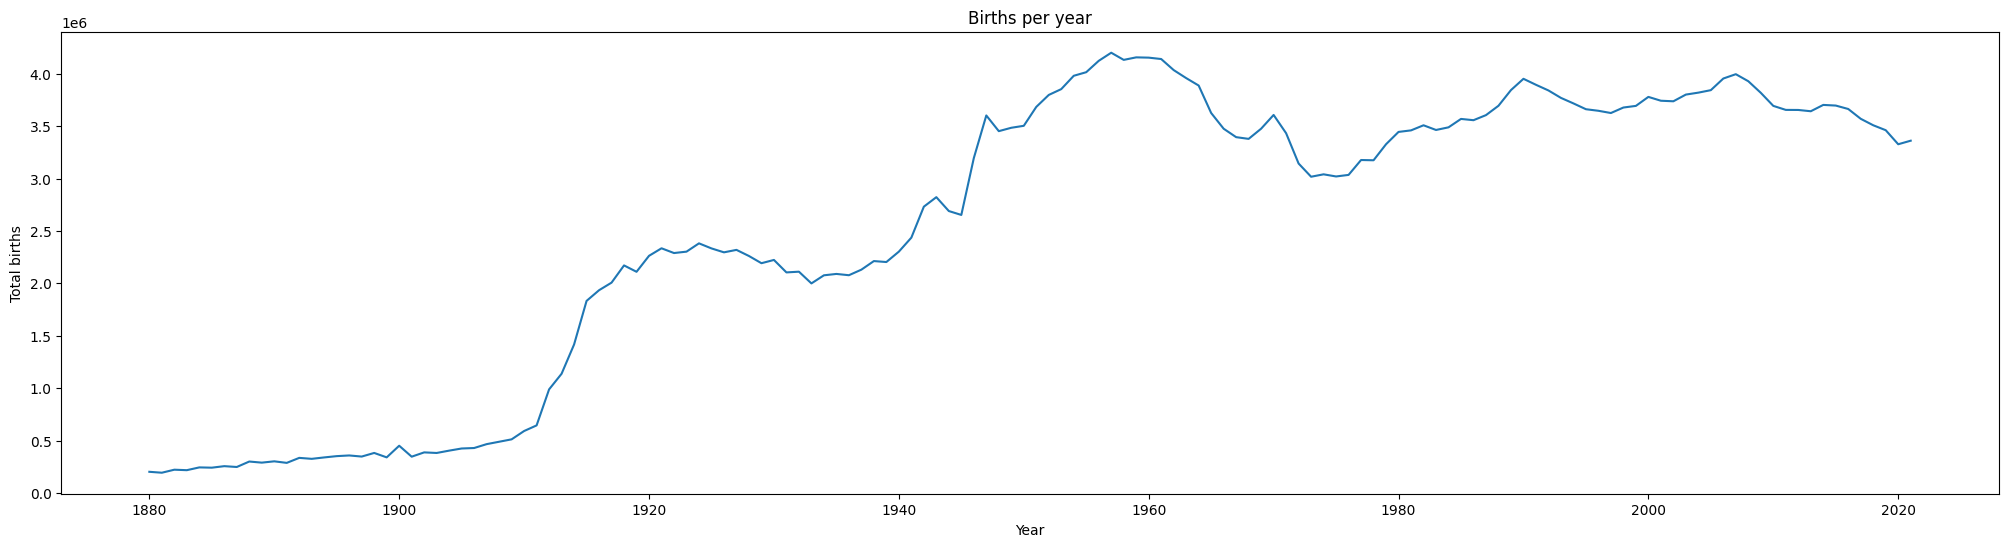

In [33]:
from datetime import datetime

import matplotlib.pyplot as plt

births_per_year = all_names.groupby('year')['count'].sum()


plt.figure(figsize=(25, 6))
births_per_year.plot(figsize=(25, 6))
plt.title('Births per year')
plt.xlabel('Year')
plt.ylabel('Total births')


## Task 4

In [34]:
'Yes' if 'Mattia' in all_names['name'] else 'No'

'No'

## Task 5

Text(0, 0.5, 'Number of kids')

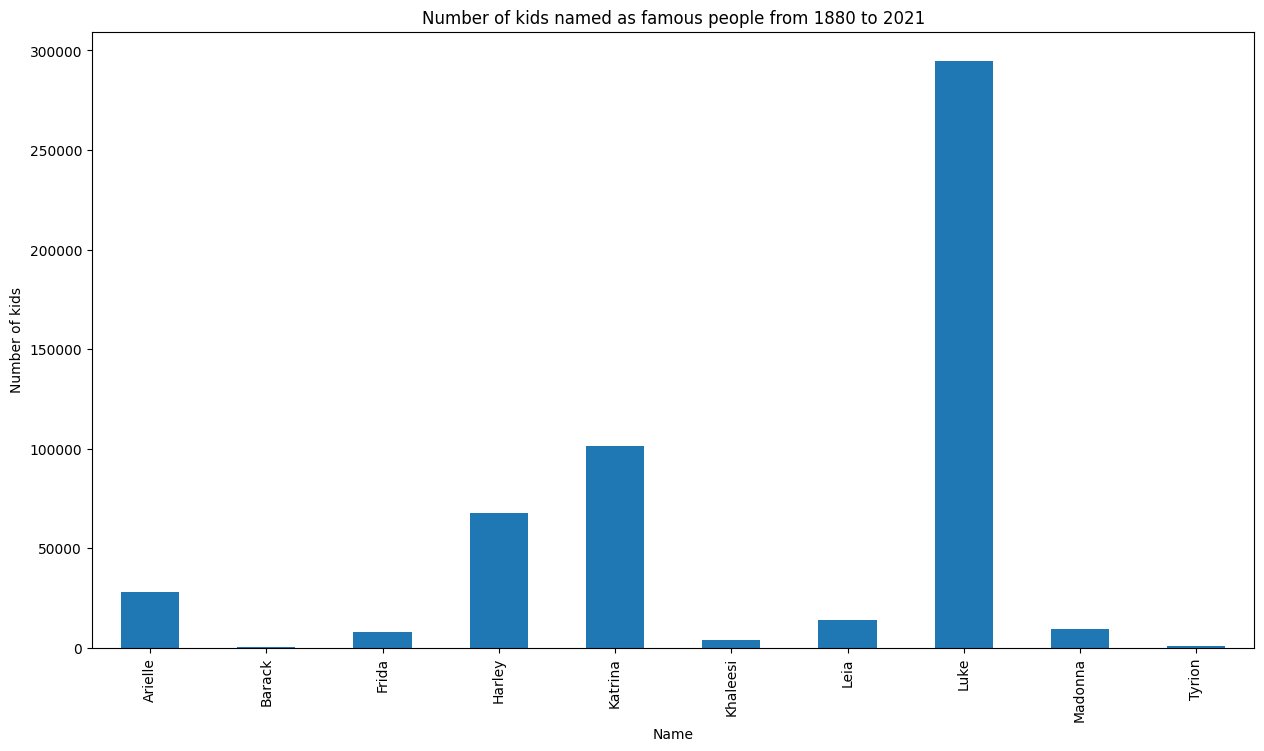

In [35]:
# I decided to change a bit the assignment to try a different chart

mask = (all_names['name'] == 'Madonna') | (all_names['name'] == 'Luke') | (all_names['name'] == 'Barack') | (all_names['name'] == 'Luke') | (all_names['name'] == 'Harley') | (all_names['name'] == 'Tyrion') | (all_names['name'] == 'Katrina') | (all_names['name'] == 'Leia') | (all_names['name'] == 'Frida') | (all_names['name'] == 'Arielle') | (all_names['name'] == 'Khaleesi')
filtered_table = all_names[mask]

name_counts = filtered_table.groupby('name')['count'].sum()


name_counts.plot(kind='bar', figsize=(15, 8))
plt.title('Number of kids named as famous people from 1880 to 2021')
plt.xlabel('Name')
plt.ylabel('Number of kids')


## Task 6

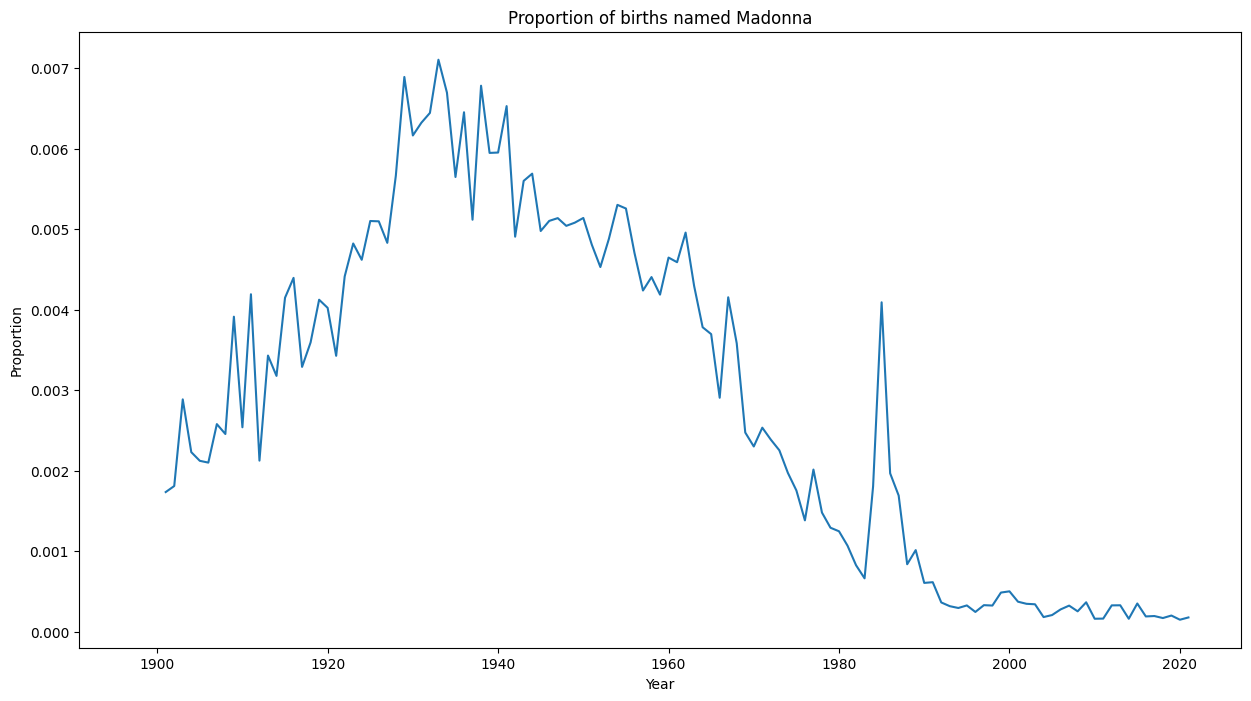

In [36]:
madonna_table = all_names[all_names['name'] == 'Madonna'].groupby('year')['count'].sum()
total_births_per_year = all_names.groupby('year')['count'].sum()

percentage_of_kids_named_madonna = madonna_table / total_births_per_year * 100

percentage_of_kids_named_madonna.plot(figsize=(15, 8))
plt.title(f'Proportion of births named Madonna')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.show()


### Answer to the question

Dividing the count of a given name by the total number of births of that year gives the proportion of babies with that name out of the total number of babies born that year. I then decided to make it a percentage to have a better idea.

# Data Visualization

## Task 1

In [37]:
all_names

,name,gender,count,year
0,Emily,F,25957,2000
1,Hannah,F,23085,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17708,2000
...,...,...,...,...
32068,Zyheem,M,5,2019
32069,Zykel,M,5,2019
32070,Zyking,M,5,2019
32071,Zyn,M,5,2019


## Task 2

In [38]:
def last_letter(name):
    return name[-1].upper()

all_names['last_letter'] = all_names['name'].apply(last_letter)
print(all_names)

          name gender  count  year last_letter
0        Emily      F  25957  2000           Y
1       Hannah      F  23085  2000           H
2      Madison      F  19968  2000           N
3       Ashley      F  17997  2000           Y
4        Sarah      F  17708  2000           H
...        ...    ...    ...   ...         ...
32068   Zyheem      M      5  2019           M
32069    Zykel      M      5  2019           L
32070   Zyking      M      5  2019           G
32071      Zyn      M      5  2019           N
32072    Zyran      M      5  2019           N

[2052781 rows x 5 columns]


## Task 3

<Axes: xlabel='last_letter'>

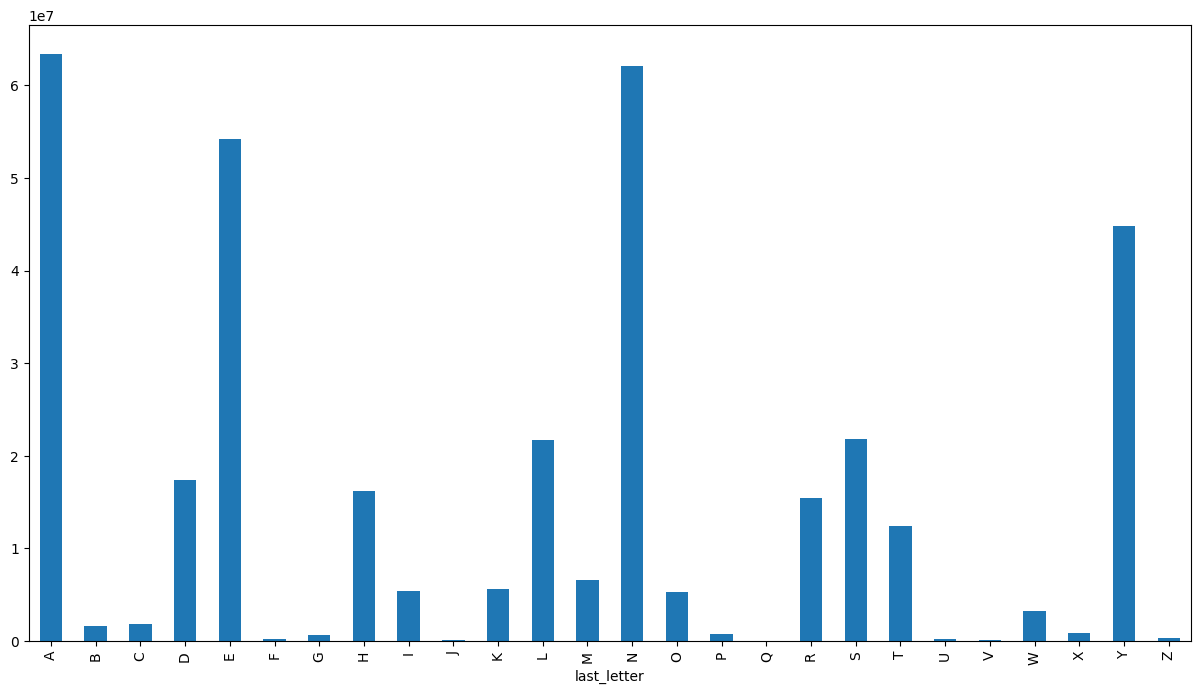

In [39]:
last_letter_counts = all_names.groupby('last_letter')['count'].sum()

# Create a bar plot
last_letter_counts.plot(kind='bar', figsize=(15, 8))

## Task 4

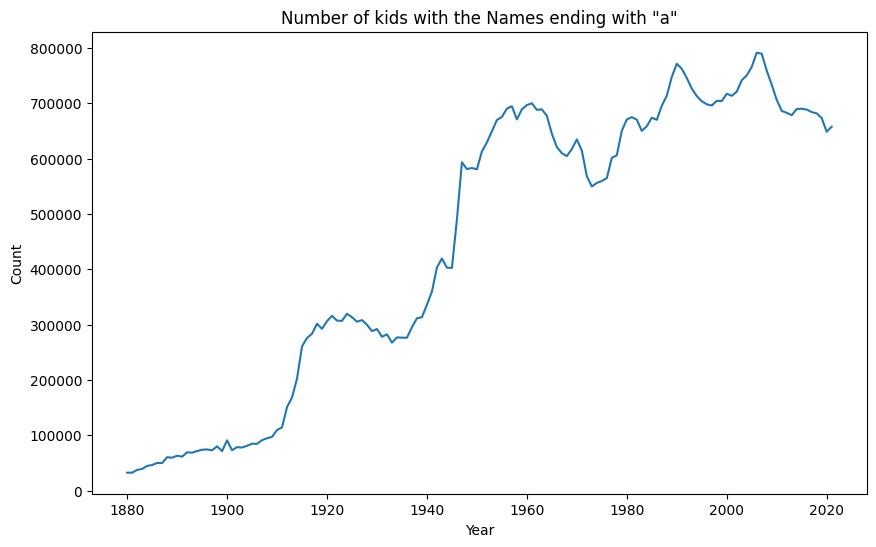

In [53]:
# Filter the data to only include names ending with 'a'
a_names = all_names[all_names['last_letter'] == 'A']

# Group by year and sum the count
a_count_by_year = a_names.groupby('year')['count'].sum()

# Create a line plot
a_count_by_year.plot(kind='line', figsize=(10,6))
plt.title('Number of kids with the Names ending with "a"')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Task 5

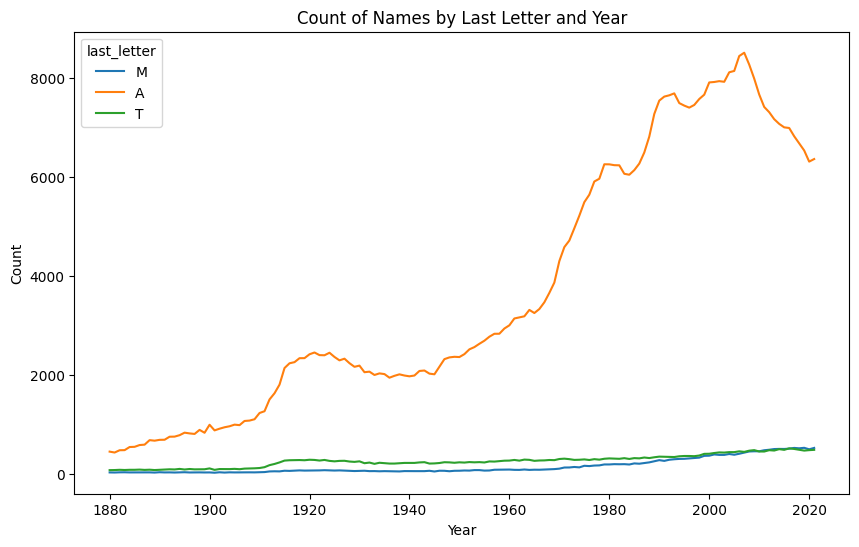

In [60]:
# Count the number of names grouped by last letter and year
count_by_letter_year = all_names.groupby(['last_letter', 'year'])['count'].count()

# Convert the dataframe to a crosstable
count_by_letter_year = count_by_letter_year.unstack(0)

# Select the last letters we want to plot
letters = ['M', 'A', 'T']


# Create a line plot
count_by_letter_year[letters].plot(kind='line', figsize=(10,6))
plt.title('Count of Names by Last Letter and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Task 6

first_letter        A        B        C        D        E       F        G  \
last_letter                                                                  
Z               810.0    329.0    761.0    390.0    142.0   695.0     28.0   
Y              9094.0   9276.0  12015.0   8759.0   4656.0  2192.0   4630.0   
X               616.0    310.0     76.0    193.0    176.0   338.0      3.0   
W               433.0    242.0     37.0    421.0     54.0     1.0      NaN   
V               346.0     54.0      7.0    158.0     15.0     NaN    200.0   
U               691.0    354.0    173.0    194.0    468.0    63.0     20.0   
T              2498.0   3878.0   2252.0   1416.0   3487.0   804.0   1956.0   
S             10158.0   2047.0   7076.0   8309.0   2949.0  2139.0   2453.0   
R              6752.0   2643.0   5773.0   2250.0   4737.0  1265.0   2281.0   
Q                70.0      NaN      NaN     28.0     30.0    37.0      NaN   
P               182.0    144.0    199.0     33.0      1.0    54.

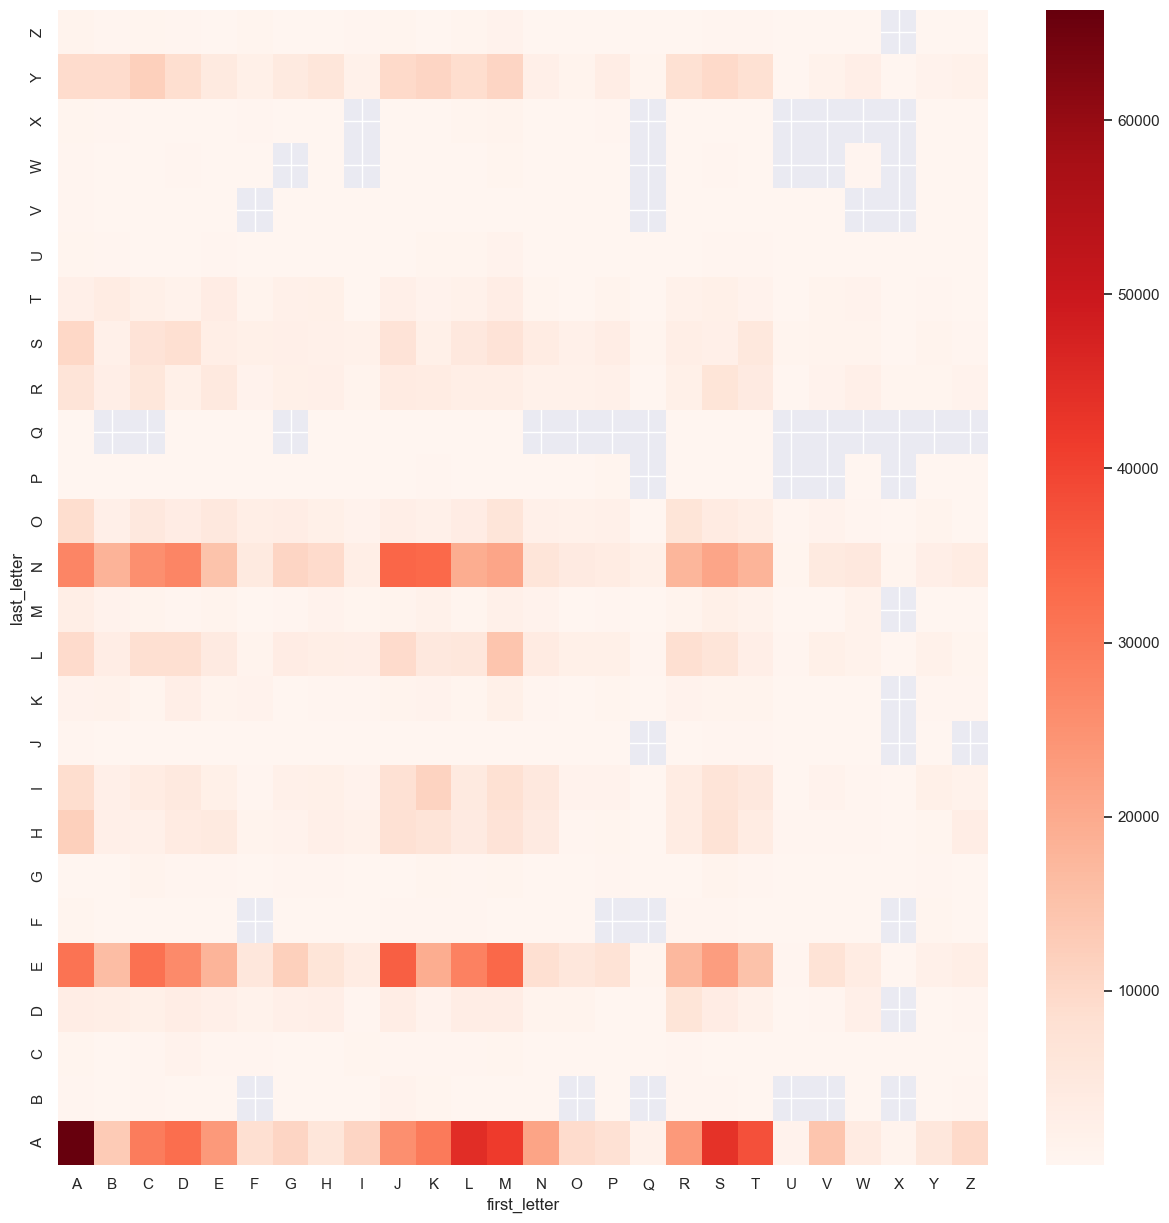

In [ ]:
def first_letter(name):
    return name[0]

all_names['first_letter'] = all_names['name'].apply(first_letter)

# Count the number of occurrences of each combination of first and last letter
counts = all_names.groupby(['first_letter', 'last_letter']).size()

# Convert the resulting Series to a DataFrame and reset the index
counts_pivot = counts.unstack(0)

# Sort the rows by the most frequent combination
counts_pivot = counts_pivot.sort_values(by='last_letter', axis=0, ascending=False)
print(counts_pivot)

# Plot a heatmap
sns.heatmap(counts_pivot, cmap='Reds')

# Save the plot in 150 dpi
plt.savefig('heatmap.png', dpi=150)

plt.show()


## Task 8

In my opinion the best option would be a Bar Chart. The real choice would be which one in particular. 

For example a grouped chart bar would show the frequency of each last letter for girls and boys side-by-side, differentiating them with a color. The x-axis would show the last letters, and the y-axis would show the frequency. 


